# *Lab #3* 


In [2]:
## Importing Libraries 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as signal
from scipy import stats
import pandas as pd

## Problem 1

In this problem we are looking at termerature reading data associated with an experiment. The termperature should be at 12 Kelvin, with a 0.4 degree precision. However there are glitches that give data that are not consistent with the real temperature. We need to identify and throw out all the data that was taken when the thermal controll system was not working.

Simulated data: 
- simulate 100k 'good' data points with gaussian fluctuations
- with 'bad' data points {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

### A) Goal is to identify bad data and throw it out

#### 1. Explore data with plots
*Plot 1 - Non-log scale:* In this plot we can see that with out the y-axis on a log scale it is impossible to see the bad data points.

*Plot 2 - Log scale plot:* With the y-axis on a log scale, it illuminates where the bad data points are.

*Plot 3 - Plot of PDF of Good Data Gaussian Ditribution:* In this plot we can see that the good data truely is a gaussian distribution, with a gaussian PDF. 

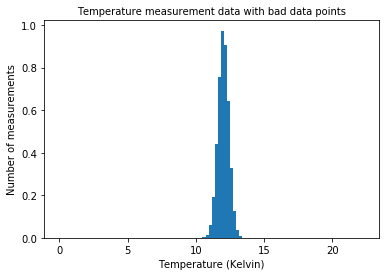

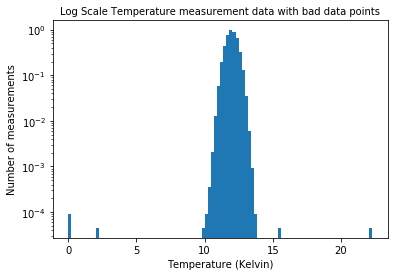

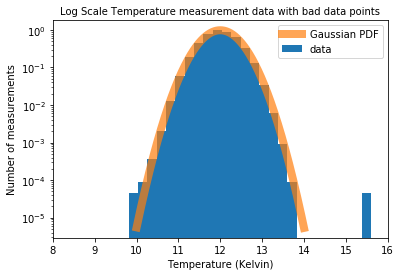

In [75]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])


#--- Plot 1: Non-log Scale Plot-- 
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 10)
#plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)

#Style plot
ax.set_xlabel('Temperature (Kelvin)')
ax.set_ylabel('Number of measurements')
ax.set_title('Temperature measurement data with bad data points', size = 10)
plt.show()


#--- Plot 2: Log-scale plot-- 
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 10)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)

#Style plot
ax.set_xlabel('Temperature (Kelvin)')
ax.set_ylabel('Number of measurements')
ax.set_title('Log Scale Temperature measurement data with bad data points', size = 10)
plt.show()


#--- Plot 3: Log-scale plot with Gaussian Fit PDF-- 

#Find fit parameters for Gaussian pdf
fit_loc, fit_beta = stats.norm.fit(d)

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, label = 'data')
plt.tick_params(labelsize = 10)
plt.yscale('log')
x = np.linspace(10,14,1000)
ax.plot(x,stats.norm.pdf(x,loc = fit_loc, scale = fit_beta),linewidth = 8,alpha = 0.7, label = 'Gaussian PDF')

#Style plot
plt.xlim([8,16])
ax.set_xlabel('Temperature (Kelvin)')
ax.set_ylabel('Number of measurements')
ax.set_title('Log Scale Temperature measurement data with bad data points', size = 10)
plt.legend()
plt.show()

#### 2. Stastical Question

Statsitical question: We want to keep all the good data measurements of 12 Kelven within 0.4 degree precision, and identify all of the bad data points to throw out. How do we identify bad data points outside of the range of 12 Kelvin plus or minus 0.4 degrees?

#### 3. Re-state Question In Math

Translate to Mathmatical Expresson:

The empirical rule states that for an approximately gaussian data set, data points within three standard deviations on either side of the mean ($\mu - 3\sigma $ and $ \mu + 3\sigma$) should encompass 99.7% of the data.  

To make sure we are capturing > 99.7% of all the data points around our good data, for our test we will use:  ($\mu - 4\sigma $ and $ \mu + 4\sigma$)

The good data follows a gaussian distribution. The mean $\mu = 12$, and the standard deviation $\sigma = 0.4$. 

The lower bound = $\mu - 4\sigma$ = 10.8  

The higher bound = $ \mu + 4\sigma$ = 13.2

To identify the bad data points, we will use a for loop to run through the entire data set. We will check if a data point is lower than the lower bound, or higher than the higher bound. If so, we will add a count to the number of bad data points.

With this test there might be a few bad data points that are counted as good values, and even though it is not likely because almost all the good data points are within three standard deviations of the mean, it's also possible that a good data point might be counted as a bad data point. 

From this dataset we know there are 100,000 good data points, and 8 bad data points. This makes 100,008 total points.

The code below is the application of this statistical test:

In [88]:
#Parse out good and bad data points with test
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

mean = 12
std = 0.4


#for loop to go through data and clean it within 4 standard deviations of the mean
lowerBound = mean - (4*std)
upperBound = mean + (4*std)
print('bounds: ', lowerBound, upperBound)
print()

#find bad data points in data 
badData = 0;
goodData = 0;

#
print('list of bad data points: ')
for i in range(len(d)):
    dataPoint = d[i] 
    if ( dataPoint < lowerBound):
        badData = badData + 1
        print(badData,' point: ', dataPoint)
        
    if (dataPoint > upperBound):
        badData = badData + 1 
        print(badData, ' point: ', dataPoint)
       
        
#Counting Good values
for i in range(len(d)):
    dataPoint = d[i] 
    if (lowerBound <= dataPoint <= upperBound):
        goodData = goodData+1

print('total bad data points = ', badData)
print()

print('total good data points = ', goodData)
print('total data points = ', (badData + goodData))
print('percent of good data captured = ', goodData/len(d))

bounds:  10.4 13.6

list of bad data points: 
1  point:  13.6193348675256
2  point:  10.317469610021808
3  point:  13.664641524464795
4  point:  10.395229926142818
5  point:  10.0
6  point:  10.3
7  point:  2.1
8  point:  0.0
9  point:  0.0
10  point:  15.6
11  point:  22.3
total bad data points =  11

total good data points =  99997
total data points =  100008
percent of good data captured =  0.999890008799296


#### 3. Truth Table from Statistical Test Data


In [91]:
#testGood True T
# tgTT = goodData
# tgBT = 
 
# tbTB = 
# tbTT =


#Build Truth Table from Data 
Truth = {'True T': [99996,4],
        'Bad T': [1,7]}

TruthFrame = pd.DataFrame(Truth, columns = ['True T', 'Bad T'], index=['Our Test Good', 'Our Test Bad'])

TruthFrame

,True T,Bad T
Our Test Good,99996,1
Our Test Bad,4,7


In the truth table above we can see that our test did pretty well. It was able to correctly identify 99.9% of the good data, and almost all of the bad data. 

### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

Because the data is randomized, there might be times when good data points fall outside the bounds of our test. With most of the data in a tight gaussian distribution around the mean, only a very small number of data points were omitted compaired to the 100,000 good data points. With our bounds set to + or - four standard deviations away from the mean, we were able to capture the good data with a 99.9% success rate. 

By expanding the range of what the test considers good data (lowering the lower bound, and raising the upper bound) the number of omissions will be lower, but the number of bad data points counted as good data points will be higher. 

This also goes the opposite way, by decreasing the range of what the test considers good data (raising the higher bound, and lowering the upper bound) we will omit more bad data points, but also ommit a higher number of good data points.

Overall, the number of omissions depends on the statistical thresholds chosen for the lowerbound and the upperbound of the test.

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Our test avoids mistakes of commission if the bad data points are far away enough from the mean. Bad data that is within our statistical threshold of + and - 4 standard deviations away from the mean are not found by our test. However, if our test has a couple of mistakes of commission compaired to the magnitude of 100,008 data points we are working with, it is almost completely negligible. 

## Problem 2
- In this problem we are looking for asteroids. 
- The alighnment of stars don't perfectly align due to atmospheric and instrumental effects, resulting in a 2-D Gaussian distribution. It has 1 arcsecond RMS.

A potential asroid will have some true movement between the images. We want a '5 sigma' detection of movement. What is that distance in arcseconds?

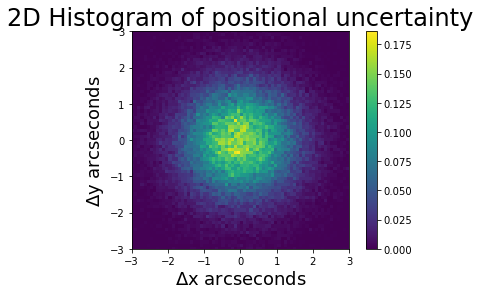

In [92]:
#Given code
x = stats.norm.rvs( scale = 1, size = 100000)
y = stats.norm.rvs( scale = 1, size = 100000)
a = np.vstack((x, y))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### 1. What is the question in words?
How do we find a 5 sigma detection of movement within our 2D Gaussion positional uncertianty data? In otherwords, what is the amplitude of the positional data that is corelated with a 5 sigma detection of movement?

#### 2. What is the question in math?

By finding the apmpltude (magnitude) array of our multivariable 2-D positional uncertianty data set, and calculating the PDF, we will able to use our PDF to find the 5 sigma detection of movement using the cdf.

The magnitude of a 2-D vector function is: $X\hat{i} + Y\hat{j}$ is $|\vec{XY}| = \sqrt{X^2 + Y^2}$

The ampliutde of a vector is equivalent to the magnitude of the vector. By finding an array of the amplitudes, we can then use the pdf of the distribution of amplitudes to find the probability. Once we have the probability, we can plut it into the percent point function (the inverse of the cumulative distribution function) to find the corelating sigma value.

Below is the problem in math:

>Cumulative distribution function $= F(x)$, with x = a continuous random variable

>Survival function: $S(x)=P(\{X>x\})=\int _{x}^{\infty }f(u)\,du=1-F(x)$

> Plug probability from value from S(x) into the PPF to find Sigma

In [93]:
def amplitude(x,y):
    result = np.sqrt(x**2+y**2)
    return result

In [ ]:
amp = np.sort(amplitude(x,y))

ampMean = np.mean(amp)

In [96]:
#Find fit parameters 
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(amp)

print('Find Fit Parameters:')
print('    alpha = ', fit_alpha)
print('    loc = ', fit_loc)
print('    scale = ', fit_beta)

Find Fit Parameters:
    alpha =  5.222473940713334
    loc =  -0.270161261734734
    scale =  0.29240745314095834


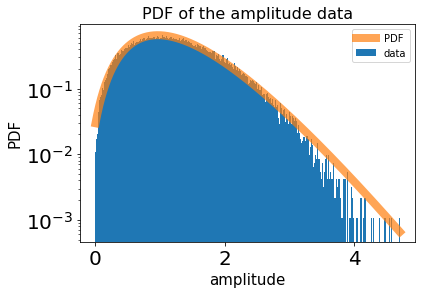

In [97]:
#-----Plot Amplitude------
#Histogram with Probability Density function
fig, ax = plt.subplots(1, 1)
plt.yscale('log')
ax.hist(amp,500, density=True, label='data')

plt.tick_params(labelsize = 20)

gammaFitPDF = stats.gamma.pdf(amp, a = fit_alpha, loc = fit_loc, scale = fit_beta)
ax.plot(amp,gammaFitPDF,linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('amplitude', size = 15)
ax.set_ylabel('PDF', size = 15)
ax.set_title('PDF of the amplitude data', size = 16)
plt.legend()
plt.show()

In [112]:
sigma = 5
prob5 = stats.norm.sf(sigma, loc=0, scale=1)
print('probability of getting a measurement 5 sigma away from the mean in a standard normal distribution: ', prob5)

probability of getting a measurement 5 sigma away from the mean in a standard normal distribution:  2.866515718791933e-07


In [110]:
measureAmp = stats.gamma.ppf(1-prob5, a = fit_alpha, loc = fit_loc, scale = fit_beta)
print('distance in arc seconds: ', measureAmp)

distance in arc seconds:  7.149497604071106


In [107]:
stats.gamma.sf(measureAmp,a = fit_alpha, loc = fit_loc, scale = fit_beta)

2.8665157192353466e-07

#### 3. What distance in arcseconds represents a 5 sigma detection of motion?
The value of 5 sigma =  2.866515718791933e-07. 
The distance in arc seconds that corelates to a 5 sigma measurement = **7.14 arcseconds**.

## Problem 3
Cosmic rays are a key background for gamma-ray telescopes. The sun and moon appear as holes in the cosmic ray sky. Assume in a moon sized patch on the sky, there is a cosmic ray rate of one cosmic ray per minute. The oberservation of the moon is for 8 hrs a day, for 15 days, and 6800 cosmic rays are observed. 


#### 1. What is the question in words?

What is the significance of our moon shadow detection on the 6800 cosmic rays?

We can find the total number of rays that should appear because we know the rays per minuite, hours observed per day, and total days observed. Then we can compare the detected cosmic rays to the actuall arival of cosmic rays to calculate the significance.

#### 2. Question in Math

First we make poisson distributed cosmic ray data.

Then we find the PMF of this data, after 1 day.

Next, to find the distribution after 15 days, we calculate the summed pmf distribution over 15 days.

To find the signaficance associated with a measurement of 6800 cosmic rays, we take the CDF of the poisson distribution at 6800, which gives us a probability value.

Plugging this probability value into the PPF, we are left with the sigma value coresponding to a measurement of measurement of 6800 cosmic rays.

In [25]:
#---- PROBLEM SET UP ----

#average nightly cosmic-ray background noise
cosmicRay_dayAvg = 1*60*8;

#poisson distribution cosmic-ray background noise data
data_cosmicRay = stats.poisson(cosmicRay_dayAvg);
#meanD = np.mean(data_cosmicRay)

#discrete random variable, number of occurances of cosmic-rays 
k_cosmicRays = np.arange(0,480*2);

#pmf of the cosmic ray background, taking a discrete variable 

#pmf of cosmic-ray background
pmf_day1 = data_cosmicRay.pmf(k_cosmicRays);

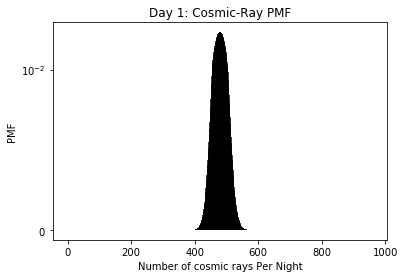

In [41]:
#---- PLOTS ----

#-----PLOT 1: DAY 3------
#plot
fig, ax1 = plt.subplots(1,1)
ax1.vlines(k_cosmicRays, 0, pmf_day1)

ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)
#Setting plot title and lables
ax1.set_xlabel('Number of cosmic rays Per Night', size = 10)
ax1.set_ylabel('PMF', size = 10)
ax1.set_title('Day 1: Cosmic-Ray PMF')

#plt.xlim([0,100])
plt.show()

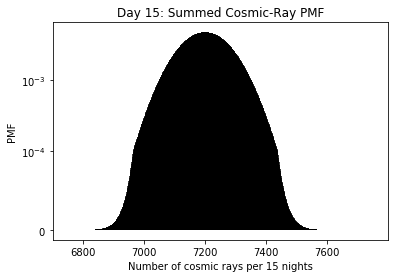

In [42]:

fig, ax = plt.subplots(1,1)
mean15 = 1*60*8*15
k15 = np.arange(6750, 7750, 1)
Poisson15 = stats.poisson.pmf(k15, mu=mu15)
ax.vlines(k15, 0, Poisson15, label='Poisson PMF for 15 Observation Nights')


plt.yscale('log')
ax.set_yscale('symlog', nonposy='clip', linthreshy=0.0001)

ax.set_xlabel('Number of cosmic rays per 15 nights', size = 10)
ax.set_ylabel('PMF', size = 10)
ax.set_title('Day 15: Summed Cosmic-Ray PMF')

plt.show()

In [40]:
#To find the signaficance associated with a measurement of 6800 cosmic rays

prob = stats.poisson.cdf(6800, mean15)
print('probability = ', prob)

sigma = stats.norm.ppf(prob, loc = 0, scale = 1)
print('significance (sigma) = ', sigma)


probability =  1.0133280183917768e-06
significance (sigma) =  -4.750747965777188


#### 3. Convert to sigma
The above is the probability and significance of a 6800 cosmic ray observation in 15 days. Negative sigma means it is on the left side of the mean of the distribution.

> sigma = -4.750747965777188

Because the signifince is below the 5 sigma threshold, it means that we can not be statistically certian that this measurement is from the desired signal, and it might be caused by the background signal. This corelates with what we see in our graph, because after 15 days the expected average vale of total cosmic rays is 7200.